## Is there a crack?

## Step 0: Preliminary checks

**Credits:** 
This assignment is what I'm submitting for lesson 1 of the fastai course. I utilized the neural network resnet18, the library fast ai, and I employed data from the source provided by Arun Pandian.

In [10]:
#NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
#    This code is only here to check that your internet is enabled. It doesn't do anything else.
#  Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

## Step 1: Train the model

In [11]:
from pathlib import Path

path = Path("../input/surface-crack-detection")

To train a model, we'll need `DataLoaders`, which is an object that contains a *training set* (the images used to create a model) and a *validation set* (the images used to check the accuracy of a model -- not used during training). In `fastai` we can create that easily using a `DataBlock`, and view sample images from it:

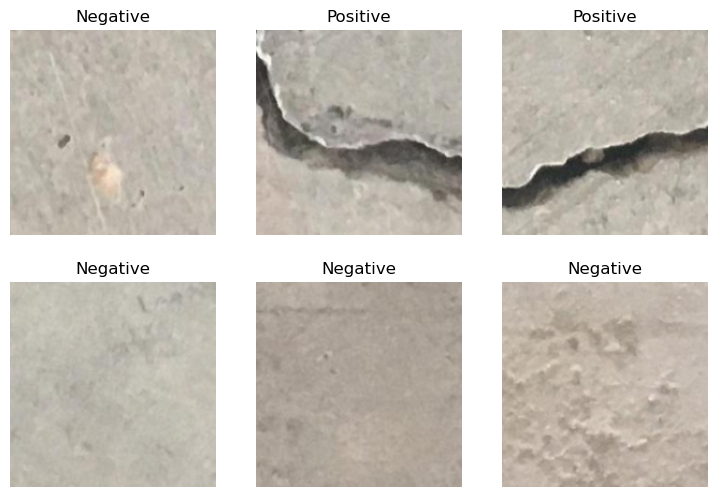

In [30]:
import numpy
from fastai.vision.all import *

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

Now we are ready for the fine tuning. 
The fastest widely used computer vision model is `resnet18`.
`fastai` comes with a helpful `fine_tune()` method which automatically uses best practices for fine tuning a pre-trained model, so we'll use that.

In [13]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.027346,0.009476,0.003250,03:24


epoch,train_loss,valid_loss,error_rate,time
0,0.019893,0.004944,0.001125,03:28
1,0.009384,0.003982,0.000750,03:27
2,0.000309,0.002462,0.000500,02:52


Afrer just a few minutes, the neural network has reached an error below 0.1 percent.



## Step 3: Application of the trained model.

Let's test if the model can detect cracks with a few test images:

Is this cracked: Positive.
Probability it's a cracked: 0.7700


Is this cracked: Negative.
Probability it's a cracked: 0.0022


Is this cracked: Positive.
Probability it's a cracked: 0.9754


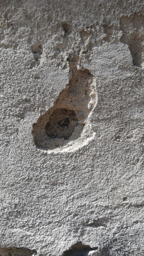

In [36]:


#A picture that I took outside as a test
is_cracked,_,probs = learn.predict(PILImage.create("../input/surfaces/wall1.jpg"))
print(f"Is this cracked: {is_cracked}.")
print(f"Probability it's a cracked: {probs[1]:.4f}")
im1 = Image.open("../input/surfaces/wall1.jpg")




#The picture I downloaded from the internet
is_cracked,_,probs = learn.predict(PILImage.create("../input/surfaces/wall2.jpg"))
print(f"Is this cracked: {is_cracked}.")
print(f"Probability it's a cracked: {probs[1]:.4f}")
im2 = Image.open("../input/surfaces/wall2.jpg")


#A picture of a wall of my house
is_cracked,_,probs = learn.predict(PILImage.create("../input/surfaces/wall3.jpg"))
print(f"Is this cracked: {is_cracked}.")
print(f"Probability it's a cracked: {probs[1]:.4f}")
im3 = Image.open("../input/surfaces/wall3.jpg")


#im1.to_thumb(256,256)
#im2.to_thumb(256,256)
im3.to_thumb(256,256)

### Results:
Three out of three times, the model provided the correct answer!